In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [2]:
l = m.pi
n = 7
h = 5*l/n
tau = 3/n
x = np.linspace(0,l,n)
t = np.linspace(0,3,n)
x_plt, t_plt = np.meshgrid(x, t)
print(tau**2/h**2)
print(tau)


0.036475626111241596
0.42857142857142855


In [3]:
def f(x,t):
    return np.sin(x)*np.exp(-t)

## Аналитическое решение

In [6]:
def isxF(x,t):
    U = [0]*n
    for i in range(n):
        U[i] = [0]*n

    for i in range(n): #t
        for j in range(n):  #x
            U[i][j] = np.exp(-t[i])*np.cos(x[j])
    return U

U = isxF(x,t)

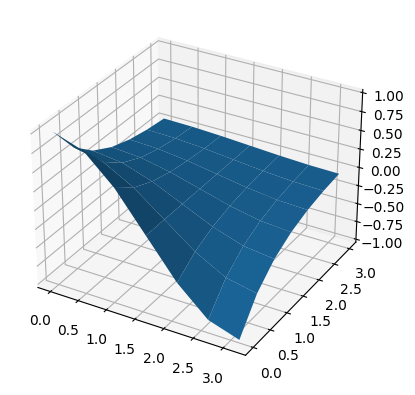

In [7]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,t_plt,np.array(U))
plt.show()

## Неявная схема

# двухточечная апроксимация с первым порядком

In [8]:
def neyavnaya1(n):
    sigma = tau**2/h/h
    u = [0]*n
    for i in range(n):
        u[i] = [0]*n

    for i in range(n):
        u[0][i] = np.cos(x[i])
    for j in range(n):
        u[1][j] = u[0][j] -np.cos(x[j])*tau
        #u[1][j] = u[0][j] -tau*np.cos(x[j]) + tau**2/2*(-np.cos(x[j])-np.sin(x[j])-np.cos(x[j])+np.sin(x[j])*np.exp(-t[0])+3*np.cos(x[j]))
        #u[1][j] = u[0][j] -tau*np.cos(x[j]) + tau**2/2*((9*u[0][0]**2+16*u[0][1]**2+u[0][2]**2-24*u[0][0]*u[0][1]+6*u[0][0]*u[0][2]-8*u[0][1]*u[0][2])/4/h/h+(-3*u[0][0]+4*u[0][1]-u[0][2])/2/h-u[0][j]+np.sin(x[j])*np.exp(-t[0])+3*np.cos(x[j]))

    for i in range(n):
        u[i][0] = np.exp(-t[i])
        u[i][n-1] = -np.exp(-t[i])


    for k in range(1,n-1):
        A = [[0 for j in range(n+1)] for i in range(n)]
        A[0][0] = 1
        A[0][1] = 0
        A[0][n] = np.exp(-t[k+1])
        for j in range(1,n-1):
            A[j][j-1] = sigma
            A[j][j] = -1-3*tau-2*sigma-tau**2/h-1
            A[j][j+1] = sigma+1/h
            A[j][n] = -2*u[k][j]-3*tau*u[k][j]-tau**2*np.sin(x[j])*np.exp(-t[k+1])+u[k-1][j]
        A[-1][n-2] = 0
        A[-1][n-1] = 1
        A[-1][n] = -np.exp(-t[k+1])

        #print(A)
        res = gauss(A)
        #print(res)

        for j in range(n):
            u[k+1][j] = res[j]
    return u

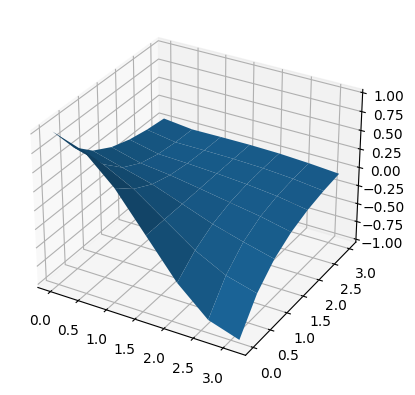

In [9]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
un = neyavnaya1(n)
ax.plot_surface(x_plt, t_plt, np.array(un))
plt.show()

# Tрёхточечная апроксимация со вторым порядком


In [10]:
def neyavnaya2(n):
    sigma = tau**2/h/h
    u = [0]*n
    for i in range(n):
        u[i] = [0]*n

    for i in range(n):
        u[0][i] = np.cos(x[i])
    for j in range(n):
        #u[1][j] = u[0][j] -np.cos(x[j])*tau
        #u[1][j] = u[0][j] -tau*np.cos(x[j]) + tau**2/2*(-np.cos(x[j])-np.sin(x[j])-np.cos(x[j])+np.sin(x[j])*np.exp(-t[0])+3*np.cos(x[j]))
        u[1][j] = u[0][j] -tau*np.cos(x[j]) + tau**2/2*((9*u[0][0]**2+16*u[0][1]**2+u[0][2]**2-24*u[0][0]*u[0][1]+6*u[0][0]*u[0][2]-8*u[0][1]*u[0][2])/4/h/h+(-3*u[0][0]+4*u[0][1]-u[0][2])/2/h-u[0][j]+np.sin(x[j])*np.exp(-t[0])+3*np.cos(x[j]))

    for i in range(n):
        u[i][0] = np.exp(-t[i])
        u[i][n-1] = -np.exp(-t[i])


    for k in range(1,n-1):
        A = [[0 for j in range(n+1)] for i in range(n)]
        A[0][0] = 1
        A[0][1] = 0
        A[0][n] = np.exp(-t[k+1])
        for j in range(1,n-1):
            A[j][j-1] = sigma
            A[j][j] = -1-3*tau-2*sigma-tau**2/h-1
            A[j][j+1] = sigma+1/h
            A[j][n] = -2*u[k][j]-3*tau*u[k][j]-tau**2*np.sin(x[j])*np.exp(-t[k+1])+u[k-1][j]
        A[-1][n-2] = 0
        A[-1][n-1] = 1
        A[-1][n] = -np.exp(-t[k+1])

        #print(A)
        res = gauss(A)
        #print(res)

        for j in range(n):
            u[k+1][j] = res[j]
    return u

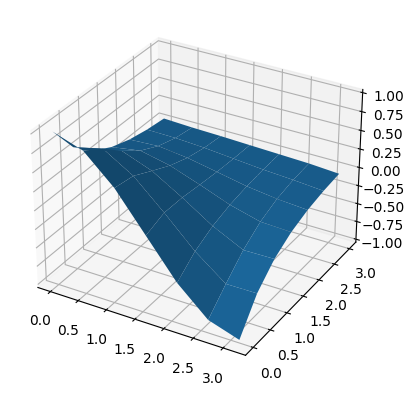

In [11]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
un1 = neyavnaya2(n)
ax.plot_surface(x_plt, t_plt, np.array(un1))
plt.show()


## Явная схема

# Двухточечная апроксимация со вторым порядком


In [12]:
def yavnaya(n):
    u = [0]*n
    for i in range(n):
        u[i] = [0]*n

    for i in range(n):
        u[i][0] = np.exp(-t[i])
        u[i][n-1] = -np.exp(-t[i])

    for i in range(n):
        u[0][i] = np.cos(x[i])

    for j in range(n):
        #u[1][j] = u[0][j] -np.cos(x[j])*tau
        u[1][j] = u[0][j] -tau*np.cos(x[j]) + tau**2/2*(-np.cos(x[j])-np.sin(x[j])-np.cos(x[j])+np.sin(x[j])*np.exp(-t[0])+3*np.cos(x[j]))
        #u[1][j] = u[0][j] -tau*np.cos(x[j]) + tau**2/2*((9*u[0][0]**2+16*u[0][1]**2+u[0][2]**2-24*u[0][0]*u[0][1]+6*u[0][0]*u[0][2]-8*u[0][1]*u[0][2])/4/h/h+(-3*u[0][0]+4*u[0][1]-u[0][2])/2/h-u[0][j]+np.sin(x[j])*np.exp(-t[0])+3*np.cos(x[j]))
    for j in range(1,n-1):
        for k in range(1,n-1):
            #u[k+1][j] = ((2*u[k][j]-u[k-1][j])/tau/tau+3*u[k][j]/tau+(u[k][j+1]-2*u[k][j]+u[k][j-1])/h/h+(u[k][j+1]-u[k][j])/h-u[k][j]+np.sin(x[j])*np.exp(-t[k]))/(1/tau/tau+3/tau)
            u[k+1][j] = (u[k][j]*(2/tau/tau+3/tau-2/h/h-1/h-1)+u[k-1][j]*(-1/tau/tau)+u[k][j+1]*(1/h/h+1/h)+u[k][j-1]*(-1/h/h)+np.sin(x[j])*np.exp(-t[k+1]))/(1/tau/tau+3/tau)
    return u

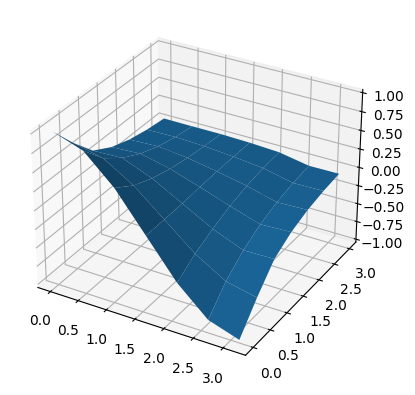

In [13]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
u = yavnaya(n)
ax.plot_surface(x_plt, t_plt, np.array(u))
plt.show()

In [4]:
def gauss(A):
    q = len(A)
    L = [[0 for j in range(q)] for i in range(q)]
    p = 0
    for i in range(0,q):
        L[i][i] = 1
    for i in range(q):
        if (A[i][i] == 0):
            for j in range(q):
                if (A[j][i] != 0):
                    for k in range(q):
                        tmp = A[i][k]
                        A[i][k] = A[j][k]
                        A[j][k] = tmp
        for j in range(i+1,q):
            for k in range(q-1,i-1,-1):
                if (k == i):
                    L[j][k] = A[j][i]/A[i][i]
                A[j][k] = A[j][k] - A[j][i]/A[i][i]*A[i][k]
    #print(L)
    U = [[0 for j in range(q)] for i in range(q)]
    for i in range(q):
        for j in range(q):
            U[i][j] = A[i][j]
    #print(U)
    z = np.zeros(q)
    for i in range(q):
        z[i] = A[i][q]
    for i in range(1,q):
        for j in range(0,i):
            z[i] = z[i] - L[i][j]*z[j]
    x = [0]*q
    x[q-1] = z[q-1]/U[q-1][q-1]
    for i in range(q-2,-1,-1):
        x[i] = z[i]
        for j in range(i+1,q):
            x[i] = x[i] - U[i][j]*x[j]
        x[i] = x[i]/U[i][i]

    return x

In [5]:
def progonka(a,b,c,d):
    P = [0]*n
    Q = [0]*n

    P[0] = -c[0]/b[0]
    for i in range(1,n):
        P[i] = -c[i] / (b[i] + a[i] * P[i - 1])

    Q[0] = d[0] / b[0]
    for i in range(1,n):
        Q[i] = (d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1])

    result = [0]*n
    result[n-1] = Q[n-1]
    for i in range(n-2,0):
        result[i] = P[i] * result[i + 1] + Q[i]

    return result